# Clearing images using a Denoising autoencoder
### Ref. Deep Learning with TensorFlow 2 and Keras ch.9
In denoising autoecoders the dimensions of the hidden layer are more than the input layers.

A denoising autoencoder learns from a corrupted (noisy) input; it feed its encoder network the noisy input, and then the reconstructed image from the decoder is compared with the original input. The idea is that this will help the network learn how to denoise an input.

### Import required modules

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

### Define hyperparameters

In [3]:
np.random.seed(11)
tf.random.set_seed(11)
batch_size = 256
max_epochs = 50
learning_rate = 1e-3
momentum = 8e-1
hidden_dim = 128
original_dim = 784

### Read the MNIST dataset, normalize it, and introduce noise in it

In [4]:
(x_train, _), (x_test, _) = K.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

# generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc= 0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise

noise = np.random.normal(loc= 0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise




### Create Encoder and Decoder (same as defined in Vanilla autoencoder)

In [5]:
# Encoder
class Encoder(K.layers.Layer):
    def __init__(self, hidden_dim) :
        super(Encoder, self).__init__()
        self.hidden_layer = K.layers.Dense(units=hidden_dim, activation=tf.nn.relu)

    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return activation

# Decoder
class Decoder (K.layers.Layer) :
    def __init__(self, hidden_dim, original_dim) :
        super(Decoder, self).__init__()
        self.output_layer = K.layers.Dense(units=original_dim, activation=tf.nn.relu)

    def call (self, encoded):
        activation = self.output_layer(encoded)
        return activation

# Autoencoder
class Autoencoder(K.Model):
    def __init__(self, hidden_dim, original_dim):
        super(Autoencoder, self).__init__()
        self.loss = []
        self.encoder = Encoder(hidden_dim=hidden_dim)
        self.decoder = Decoder(hidden_dim=hidden_dim, original_dim = original_dim)

    def call(self, input_features):
        encoded = self.encoder(input_features)
        reconstructed = self.decoder(encoded)
        return reconstructed

### Create the model and define the loss and optimizers to be used
Notice that this time instead of writing the custom training loop we are using the easier Keras inbuilt `compile()` and `fit()` methods

In [6]:
model = Autoencoder(hidden_dim, original_dim)
model.compile(loss='mse', optimizer='adam')
loss = model.fit(
    x_train_noisy, 
    x_train, 
    validation_data = (x_test_noisy, x_test), 
    epochs = max_epochs, 
    batch_size = batch_size)

Epoch 1/50
235/235 [==============================] - 3s 5ms/step - loss: 0.0507 - val_loss: 0.0335
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0303 - val_loss: 0.0275
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0269 - val_loss: 0.0259
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0260 - val_loss: 0.0254
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0254 - val_loss: 0.0248
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0251 - val_loss: 0.0247
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0250 - val_loss: 0.0245
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0246 - val_loss: 0.0242
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0245 - val_loss: 0.0242
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0245 - val_loss: 0.0241

### Plot the loss

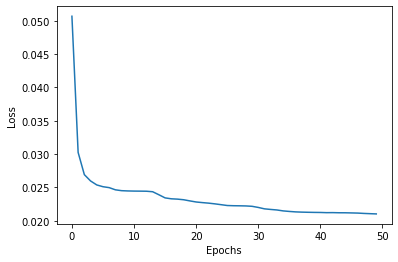

In [7]:
plt.plot(range(max_epochs), loss.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### The Model in action

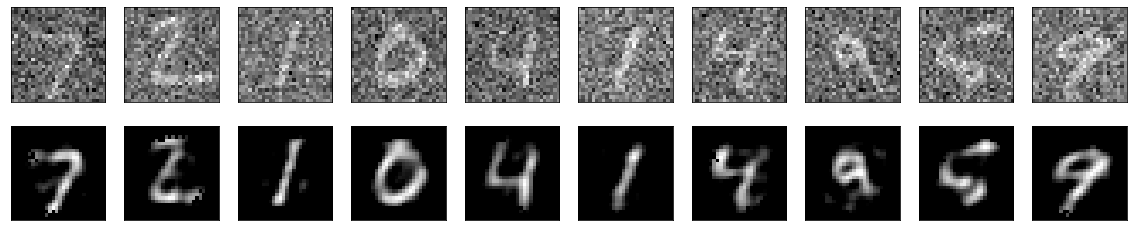

In [9]:
number = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28,28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test_noisy)[index].numpy().reshape(28,28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    

plt.show()